In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.drop(columns={'User ID'},inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


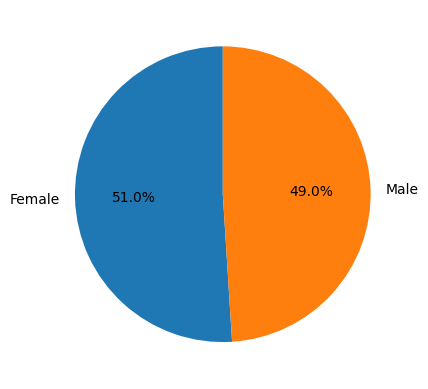

In [5]:
import matplotlib.pyplot as plt
gender_value = df['Gender'].value_counts()
plt.pie(gender_value,labels = gender_value.index,autopct='%1.1f%%', startangle=90)
plt.show()

<Axes: xlabel='Purchased', ylabel='count'>

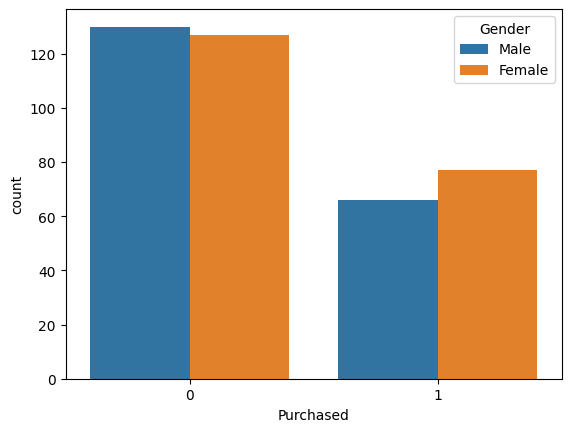

In [6]:
import seaborn as sns
sns.countplot(data=df, x='Purchased',hue='Gender')

In [7]:
df['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

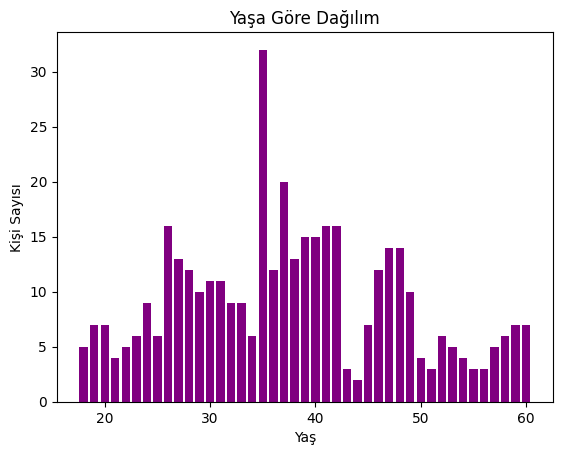

In [8]:
age_counts = df['Age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color="purple")
plt.title("Yaşa Göre Dağılım")
plt.xlabel("Yaş")
plt.ylabel("Kişi Sayısı")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [15]:
x =df.drop(['Purchased'],axis=1)
y = df['Purchased']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 3)
(120, 3)
(280,)
(120,)


In [16]:
model_rf = RandomForestClassifier()
model_lr = LogisticRegression()
model_tree = DecisionTreeClassifier()

In [18]:
y_test.unique()

array([0, 1], dtype=int64)

In [21]:
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print('CM:',confusion_matrix(y_pred,y_test,labels=[0,1]))
print('CR:',classification_report(y_test,y_pred))

Accuracy: 0.9083333333333333
CM: [[67  5]
 [ 6 42]]
CR:               precision    recall  f1-score   support

           0       0.93      0.92      0.92        73
           1       0.88      0.89      0.88        47

    accuracy                           0.91       120
   macro avg       0.90      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



In [22]:
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print('CM:',confusion_matrix(y_pred,y_test,labels=[0,1]))
print('CR:',classification_report(y_test,y_pred))

Accuracy: 0.8583333333333333
CM: [[71 15]
 [ 2 32]]
CR:               precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



C:\Users\kurt_\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
model_tree.fit(x_train,y_train)
y_pred = model_tree.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print('CM:',confusion_matrix(y_pred,y_test,labels=[0,1]))
print('CR:',classification_report(y_test,y_pred))

Accuracy: 0.8583333333333333
CM: [[64  8]
 [ 9 39]]
CR:               precision    recall  f1-score   support

           0       0.89      0.88      0.88        73
           1       0.81      0.83      0.82        47

    accuracy                           0.86       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120



In [25]:
input_df = pd.DataFrame([[1, 22, 32000]], columns=['Gender', 'Age', 'EstimatedSalary'])
model_rf.predict(input_df)

array([0], dtype=int64)